This code is meant to analyze essay winners of the Scholastic Art and Writing Competition and extract common themes and topics in these essays. I wanted to use this to encapsulate the biggest discussions and essays of the year within a few words so that I'd be able to learn which topics are most relevant to these essay writers.

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as mpl
import seaborn as sb
from time import time
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text

In [53]:
data = pd.read_csv('scholastic1.csv', encoding='utf-8')
data.head()

,Transcripts
0,"For an overactive student, daydreaming through..."
1,“Joy is not in things; it is in us” – Richard ...
2,Riots have marked America since the country’s ...
3,"Dear Governor DeWine,\n I am writing to yo..."
4,Despite having just under 5% of the world’s po...


In [54]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["took"]) # my code would include simple words like "took" and "going" because they hadn't been included in standard stop word lists
vectorizer = TfidfVectorizer(stop_words=my_stop_words, use_idf=True, ngram_range=(1,1), min_df = 0.05, max_df = 0.3)
tfidf = vectorizer.fit_transform(data['Transcripts'])

In [51]:
type(tfidf)
print(tfidf)

  (0, 1985)	0.012170750518884605
  (0, 2804)	0.009431253342763039
  (0, 2557)	0.012170750518884605
  (0, 2585)	0.010568247400021989
  (0, 1728)	0.012170750518884605
  (0, 2466)	0.012170750518884605
  (0, 3780)	0.012170750518884605
  (0, 3932)	0.012170750518884605
  (0, 2778)	0.012170750518884605
  (0, 4509)	0.010568247400021989
  (0, 4384)	0.008549332235904915
  (0, 327)	0.012170750518884605
  (0, 1719)	0.010568247400021989
  (0, 3739)	0.010568247400021989
  (0, 5008)	0.012170750518884605
  (0, 5112)	0.02434150103776921
  (0, 2636)	0.008549332235904915
  (0, 2446)	0.010568247400021989
  (0, 2410)	0.010568247400021989
  (0, 5187)	0.010568247400021989
  (0, 1291)	0.012170750518884605
  (0, 4382)	0.012170750518884605
  (0, 1836)	0.012170750518884605
  (0, 2589)	0.012170750518884605
  (0, 19)	0.012170750518884605
  :	:
  (14, 4877)	0.025117796556796655
  (14, 4721)	0.031049335881558532
  (14, 2009)	0.07535338967038996
  (14, 4674)	0.031049335881558532
  (14, 2006)	0.031049335881558532
  (1

<AxesSubplot:xlabel='usage', ylabel='word'>

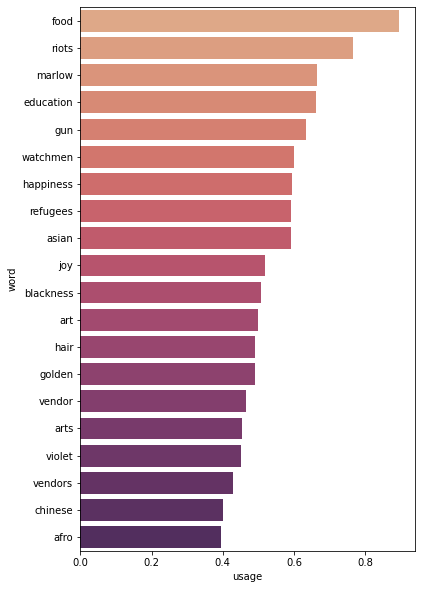

In [55]:
def rank_words(words, vector1):
    sums = vector1.sum(axis=0)
    data = []
    for indx, term in enumerate(words):
        data.append((term, sums[0,indx]))
    result = pd.DataFrame(data, columns=['word','usage']).sort_values('usage', ascending=False)
    return result

ranked = rank_words(words=vectorizer.get_feature_names(), vector1=tfidf)

fig, ax = mpl.subplots(figsize=(6,10), ncols=1, nrows=1)
sb.barplot(x='usage',y='word',data=ranked[:20], palette='flare', ax=ax)

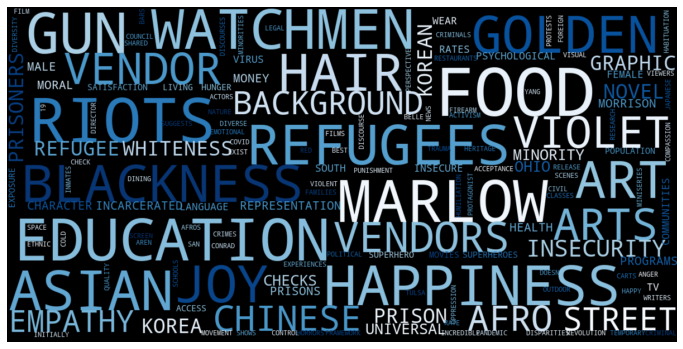

In [56]:
dic = {ranked.loc[i,'word'].upper(): ranked.loc[i,'usage'] for i in range(0,len(ranked))}
wordcloud = WordCloud(background_color='black', max_words=200, max_font_size=40, scale=3, normalize_plurals=True, colormap='Blues').generate_from_frequencies(dic)
fig = mpl.figure(1,figsize=(12,15))
mpl.imshow(wordcloud,interpolation="bilinear")
mpl.axis('off')
mpl.show()

A word cloud is a visual representation of the most common terms in this dataset. As seen, words like 'food,' 'riots,' 'marlow,' and 'education' were commonly referenced. These were clearly greatly discussed topics in the Scholastic Competition of this data's year and may continue to be pressing issues in the future. 